# Trajectory clustering with traj

Example of clustering time trajectories / time series with traj

In [3]:
library(tidyverse)
library(caret)
library(traj)

mousephen = read.csv("datasets/mousephenotype/mousephenotypedata.csv") %>% tbl_df
mousephen %>% head

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



animal,gene,sex,zygosity,week,weight
116489494,143,1,0,4.000000,17.0
116489494,143,1,0,5.000000,20.2
116489494,143,1,0,6.000000,22.1
116489494,143,1,0,7.000000,25.2
116489494,143,1,0,7.428571,25.4
116489494,143,1,0,9.000000,26.4


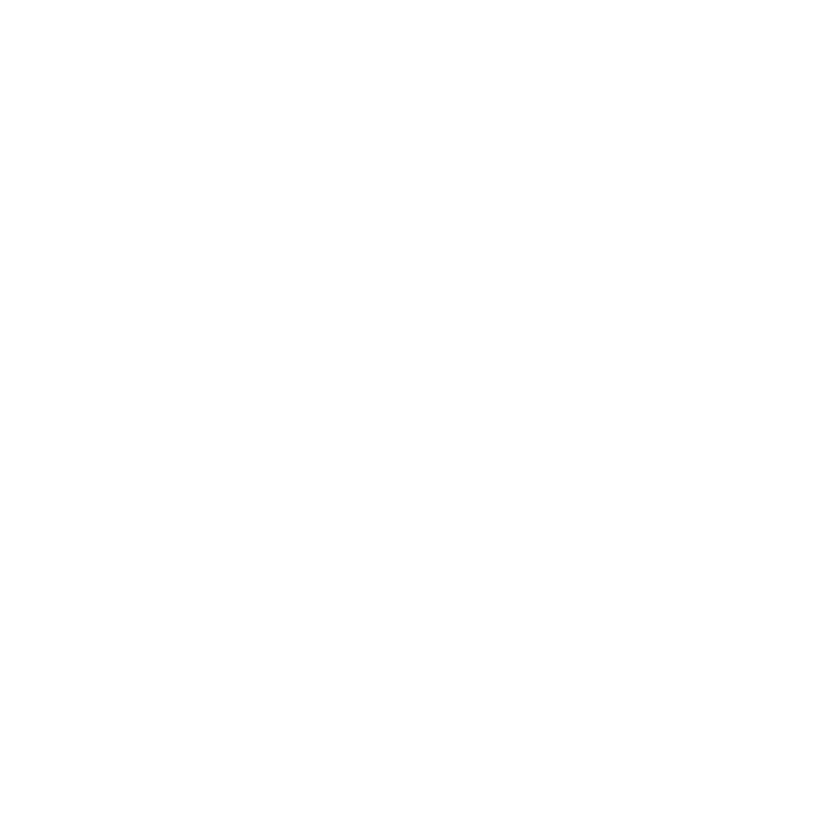

In [4]:
mousephen %>% ggplot(aes(x=week, y=weigth, color=gene)) + 
    facet_wrap(~gene) +
    geom_point()

In [ ]:
mousephen = mousephen %>% group_by(gene) %>% mutate(measurementId = row_number())


mousephen.weeks = mousephen %>%  spread(measurementId, week) %>% as.matrix
mousephen.values = mousephen %>%  spread(measurementId, week) %>%  as.matrix
dim(mousephen.values)
s1 = step1measures(mousephen.weeks, mousephen.values)

[1] 2782  313

In [ ]:
mousephen %>% group_by(animal) %>% 
    mutate(measurement.id = row_number) %>%
select(animal, week, weight)  %>%
count(animal, week)